In [1]:
import pandas as pd
import numpy as np
from helper_functions.clean_transitions import clean_transition_column
from helper_functions.simulate_game import simulate_game
from helper_functions.combine_matrices import combine_team_matrix
import time

In [ ]:
#if one team does not have data for a certain starting state, we will get a row of nan's which will break the code.
#if this occurs, we can just substitute the average probability for this row?
avg_matrix = pd.read_excel('first_transition_matrix_with_manual_edits.xlsx', sheet_name = 'Mean Pasted', index_col='Starting_State')

In [161]:
team_A = pd.read_excel('team_specific_matrix/West Virginia_A.xlsx', index_col = 'Starting_State')
team_B = pd.read_excel('team_specific_matrix/Iowa St._B.xlsx', index_col = 'Starting_State')

In [162]:
transition_matrix = combine_team_matrix(team_A, team_B)

In [163]:
for r in transition_matrix.index:
    if all(np.isnan(transition_matrix.loc[r])):
        print(r)
        transition_matrix.loc[r]=avg_matrix.loc[r]

In [164]:
abc = simulate_game(transition_matrix, num_games=10)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:03<00:00,  3.03it/s]


In [165]:
totals = []
for item in abc[1]:
    totals.append(item[0]+item[1])

In [166]:
np.mean(totals)

162.3

In [167]:
margins = []
for aaa in abc[1]:
    margins.append(aaa[0]-aaa[1])

In [168]:
from matplotlib import pyplot as plt

(array([1., 0., 1., 1., 1., 2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,
         30.,  35.,  40.,  45.,  50.,  55.]),
 <BarContainer object of 16 artists>)

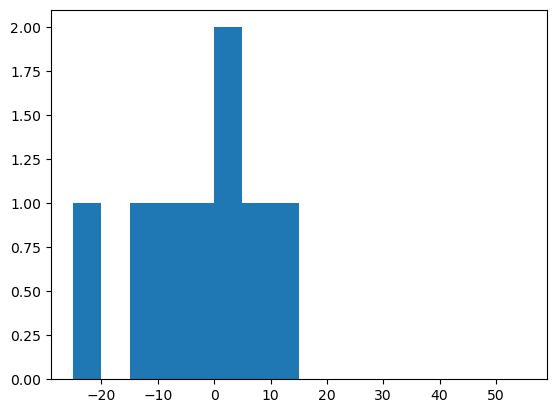

In [169]:
plt.hist(margins, bins=np.linspace(-25,55,17))

In [170]:
np.mean(margins)

-10.9

In [171]:
np.median(margins)

-6.0

In [18]:
cc = abc[0].copy()
cc['marg'] = cc['Team_A_Final']-cc['Team_B_Final']

In [19]:
cc[cc['marg']>50]

,Transition,Team_A,Team_B,Time,Period,Team_A_Final,Team_B_Final,Game Number,marg
210,"(Ar0, Bi3)",3,0,197,2,89,38,100,51
211,"(Bi3, Ar0)",0,0,170,2,89,38,100,51
212,"(Ar0, Bi2)",2,0,167,2,91,38,100,53
213,"(Bi2, Ar0)",0,0,149,2,91,38,100,53
214,"(Ar0, Br0)",0,0,140,2,91,38,100,53
215,"(Br0, Ar0)",0,0,127,2,91,38,100,53
216,"(Ar0, Br0)",0,0,119,2,91,38,100,53
217,"(Br0, Ar0)",0,0,112,2,91,38,100,53
218,"(Ar0, Br0)",0,0,103,2,91,38,100,53
219,"(Br0, Ar0)",0,0,92,2,91,38,100,53


In [21]:
a_scores = []
b_scores = []

for item in abc[1]:
    a_scores.append(item[0])
    b_scores.append(item[1])

In [22]:
np.mean(a_scores)

79.71

In [23]:
np.mean(b_scores)

76.7

In [30]:
(pd.Series(margins)>0).value_counts(dropna=False)

True     53
False    47
dtype: int64